# Esploriamo dati ARPA

Dati metereologici delle centraline di Alessandria.  
Sorgente: http://www.arpa.piemonte.gov.it/rischinaturali/accesso-ai-dati/opendata/elenco_meteo.html?delta=0

### Dati

DATA
ORA: espressa nel sistema UTC                            
ID_RETE_MONIT: Identificativo della Rete di Monitoraggio  
CODICE_ISTAT_COMUNE: Identificativo della stazione secondo codifica ISTAT   
PROGR_PUNTO_COM.: Numerazione progressiva delle stazioni con medesimo codice ISTAT  
VELV: Velocita' del vento  
DIRV: Direzione del vento  
DEVST: Deviazione standard della velocita' trasversale  
BARO: Pressione atmosferica  
TERMA: Temperatura dell'aria  
IGRO: Umidita' relativa  
RADD: Radiazione solare diretta  
RADR: Radiazione solare riflessa  
PLUV: Precipitazione  

### Tabella codici ISTAT

Se scaricate altri .csv dal link menzionato ricordatevi che questi sono i codici ISTAT dei comuni monitorati.  
Nel codice a seguire prenderemo in cosiderazione la stazione del comune di Alessandria.

|comune_stat | stazione_istat | comune|
|------- |------- | ------- |
|006003	| 900	| ALESSANDRIA LOBBI|
|002012	| 900	| OROPA|
|004028	| 900	| BOVES|
|003032	| 900	| CAMERI|
|001272	| 907	| TORINO GIARDINI REALI|
|001272	| 908	| TORINO ALENIA|
|003156	| 900	| PALLANZA|
|002158	| 900	| VERCELLI|
|005074	| 900	| MONTALDO SCARAMPI|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Specifichiamo i nomi delle colonne

#### Importiamo il .csv 
I file .csv messi a disposizione non contengono nomi per le colonne/variabili: lo indichiamo durante l'importazione con **`header=None`** 

Per aggiungere manualmente i nomi per le colonne/variabili definiamo prima una lista che passiamo con l'argomento **`names`** 

In [2]:
meteo_col = ['data', 'ora', 'id_rete_monit', 'comune_istat', 'stazione_istat', 'vento_vel', 'vento_dir', 'std_velt', 
             'baro', 'terma', 'igro', 'rad_dir', 'rad_rif', 'pluv']

In [3]:
meteo = pd.read_csv("data/AL/MonthElb_012001_006003900.csv", header=None, names=meteo_col)

In [4]:
meteo.head()

,data,ora,id_rete_monit,comune_istat,stazione_istat,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
0,01-01-2001,00:00,17,6003,900,1.8,189.1,9999.9,1012.0,-1.9,87.0,0.0,9999.9,0.0
1,01-01-2001,01:00,17,6003,900,1.6,223.9,9999.9,1012.0,-2.4,90.0,0.0,9999.9,0.0
2,01-01-2001,02:00,17,6003,900,2.6,238.7,9999.9,1012.0,-2.3,90.0,0.0,9999.9,0.0
3,01-01-2001,03:00,17,6003,900,1.6,196.9,9999.9,1012.0,-2.6,90.0,0.0,9999.9,0.0
4,01-01-2001,04:00,17,6003,900,1.1,204.7,9999.9,1012.0,-3.2,91.0,0.0,9999.9,0.0


In [5]:
meteo.shape

(8760, 14)

In [6]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
data              8760 non-null object
ora               8760 non-null object
id_rete_monit     8760 non-null int64
comune_istat      8760 non-null int64
stazione_istat    8760 non-null int64
vento_vel         8760 non-null float64
vento_dir         8760 non-null float64
std_velt          8760 non-null float64
baro              8760 non-null float64
terma             8760 non-null float64
igro              8760 non-null float64
rad_dir           8760 non-null float64
rad_rif           8760 non-null float64
pluv              8760 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 958.2+ KB


In [7]:
meteo.describe()

,id_rete_monit,comune_istat,stazione_istat,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
count,8760.0,8760.0,8760.0,8760.000000,8760.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8760.000000
mean,17.0,6003.0,900.0,3.026313,1269.768699,9.999900e+03,1009.523847,13.588573,76.515982,154.540183,9.999900e+03,0.051461
std,0.0,0.0,0.0,106.833160,3105.404057,5.893862e-10,96.384523,107.113841,20.456168,248.762794,5.893862e-10,0.398994
min,17.0,6003.0,900.0,0.000000,0.000000,9.999900e+03,986.000000,-9.700000,15.000000,0.000000,9.999900e+03,0.000000
25%,17.0,6003.0,900.0,0.800000,57.175000,9.999900e+03,1004.000000,4.900000,62.000000,0.000000,9.999900e+03,0.000000
50%,17.0,6003.0,900.0,1.700000,219.400000,9.999900e+03,1008.000000,12.200000,82.000000,0.000000,9.999900e+03,0.000000
75%,17.0,6003.0,900.0,2.600000,250.400000,9.999900e+03,1013.000000,18.900000,94.000000,232.000000,9.999900e+03,0.000000
max,17.0,6003.0,900.0,9999.900000,9999.900000,9.999900e+03,9999.900000,9999.900000,100.000000,1063.000000,9.999900e+03,12.600000


#### Osserrvazioni
Notiamo che **id_rete_monit**, **comune_istat** e **stazione_istat** contengono sempre gli stessi valori identificativi della stazione di monitoraggio di Alessandria, quindi possiamo eliminarle per ridurre le dimensioni del nostro dataframe.  


Inoltre guardando i minimi e massimi possiamo notare come alcuni sensori non fossero del tutto funzionanti sostituendo valori molto alti nel momento in cui la misurazione non era andata a buon fine.

Possiamo trattarli specificatamente uno alla volta come esercizio di pulitura ed esplorazione.

In [8]:
meteo_al = meteo.drop(['id_rete_monit', 'comune_istat', 'stazione_istat'], axis=1)

In [9]:
meteo_al.head()

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
0,01-01-2001,00:00,1.8,189.1,9999.9,1012.0,-1.9,87.0,0.0,9999.9,0.0
1,01-01-2001,01:00,1.6,223.9,9999.9,1012.0,-2.4,90.0,0.0,9999.9,0.0
2,01-01-2001,02:00,2.6,238.7,9999.9,1012.0,-2.3,90.0,0.0,9999.9,0.0
3,01-01-2001,03:00,1.6,196.9,9999.9,1012.0,-2.6,90.0,0.0,9999.9,0.0
4,01-01-2001,04:00,1.1,204.7,9999.9,1012.0,-3.2,91.0,0.0,9999.9,0.0


In [10]:
meteo_al.tail()

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
8755,31-12-2001,19:00,5.9,5.3,9999.9,1019.0,3.3,22.0,0.0,9999.9,0.0
8756,31-12-2001,20:00,3.1,12.9,9999.9,1020.0,0.9,29.0,0.0,9999.9,0.0
8757,31-12-2001,21:00,2.6,89.3,9999.9,1021.0,-1.1,38.0,0.0,9999.9,0.0
8758,31-12-2001,22:00,0.3,150.2,9999.9,1022.0,-2.3,42.0,0.0,9999.9,0.0
8759,31-12-2001,23:00,2.5,256.3,9999.9,1023.0,-4.4,52.0,0.0,9999.9,0.0


#### Aggiunta colonna mese
Al fine di verificare l'andamento anche del corso dei mesi in successive analisi per semplicità aggiungiamo una colonna mese elaborando la data già presente fra i nostri dati.

Nota: esistono librerie standard inerenti all'elaborazione e manipolazione di date ed ore.

In [11]:
meteo_al['mese'] = meteo_al['data'].apply(lambda mese: mese.split('-')[1])

In [12]:
meteo_al.head()

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese
0,01-01-2001,00:00,1.8,189.1,9999.9,1012.0,-1.9,87.0,0.0,9999.9,0.0,01
1,01-01-2001,01:00,1.6,223.9,9999.9,1012.0,-2.4,90.0,0.0,9999.9,0.0,01
2,01-01-2001,02:00,2.6,238.7,9999.9,1012.0,-2.3,90.0,0.0,9999.9,0.0,01
3,01-01-2001,03:00,1.6,196.9,9999.9,1012.0,-2.6,90.0,0.0,9999.9,0.0,01
4,01-01-2001,04:00,1.1,204.7,9999.9,1012.0,-3.2,91.0,0.0,9999.9,0.0,01


#### Decidiamo che vogliamo trattare la velocità del vento.  
Quanti sono i valori anomali riscontrati?  
Analizziamo i valori statistici per decidere una soglia oltre la quale i valori non hanno senso e togliamo tali valori.

In [13]:
meteo_al.describe()

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
count,8760.000000,8760.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8760.000000
mean,3.026313,1269.768699,9.999900e+03,1009.523847,13.588573,76.515982,154.540183,9.999900e+03,0.051461
std,106.833160,3105.404057,5.893862e-10,96.384523,107.113841,20.456168,248.762794,5.893862e-10,0.398994
min,0.000000,0.000000,9.999900e+03,986.000000,-9.700000,15.000000,0.000000,9.999900e+03,0.000000
25%,0.800000,57.175000,9.999900e+03,1004.000000,4.900000,62.000000,0.000000,9.999900e+03,0.000000
50%,1.700000,219.400000,9.999900e+03,1008.000000,12.200000,82.000000,0.000000,9.999900e+03,0.000000
75%,2.600000,250.400000,9.999900e+03,1013.000000,18.900000,94.000000,232.000000,9.999900e+03,0.000000
max,9999.900000,9999.900000,9.999900e+03,9999.900000,9999.900000,100.000000,1063.000000,9.999900e+03,12.600000


In [14]:
meteo_al[meteo_al['vento_vel'] > 50]

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese
6417,25-09-2001,09:00,9999.9,9999.9,9999.9,1006.0,16.4,99.0,266.0,9999.9,0.0,09


In [15]:
al = meteo_al.drop(6417)

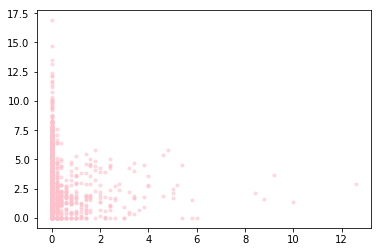

In [16]:
plt.plot(al['pluv'], al['vento_vel'], marker='.', linestyle='', alpha=0.5, c='pink')
plt.show()

#### Giorni più piovosi
Sempre analizzando i dati statistici andiamo a stabilire una soglia per valutare i giorni più piovosi.  
Giochiamo un po' con questi parametri per notare come cambiamo i risultati.

In [17]:
piovoso = meteo_al[meteo_al['pluv'] > 1]
piovoso.shape

(121, 12)

In [18]:
piovoso.head()

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese
39,02-01-2001,15:00,0.0,9999.9,9999.9,1007.0,0.3,98.0,0.0,9999.9,2.2,01
40,02-01-2001,16:00,0.0,9999.9,9999.9,1006.0,0.1,98.0,0.0,9999.9,2.6,01
41,02-01-2001,17:00,0.3,286.4,9999.9,1007.0,0.0,98.0,0.0,9999.9,3.4,01
42,02-01-2001,18:00,0.6,228.5,9999.9,1007.0,0.0,98.0,0.0,9999.9,2.2,01
44,02-01-2001,20:00,1.4,248.2,9999.9,1007.0,-0.1,98.0,0.0,9999.9,2.0,01


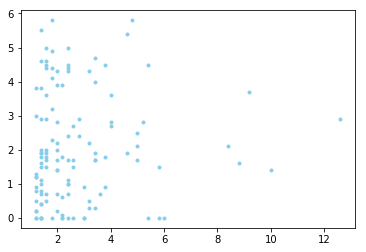

In [19]:
plt.plot(piovoso['pluv'], piovoso['vento_vel'], marker='.', linestyle='', alpha=1, c='skyblue')
plt.show()

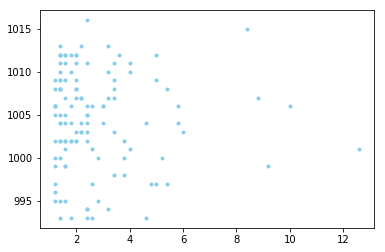

In [20]:
plt.plot(piovoso['pluv'], piovoso['baro'], marker='.', linestyle='', alpha=1, c='skyblue')
plt.show()

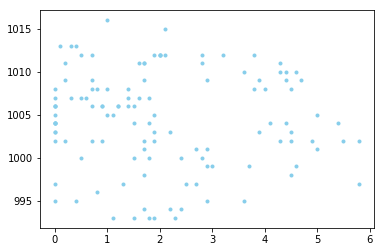

In [21]:
plt.plot(piovoso['vento_vel'], piovoso['baro'], marker='.', linestyle='', alpha=1, c='skyblue')
plt.show()

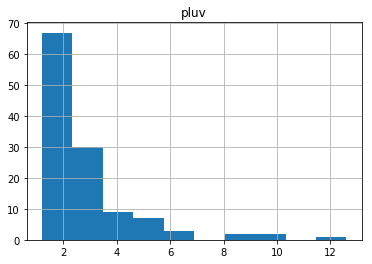

In [22]:
piovoso.hist('pluv')
plt.show()

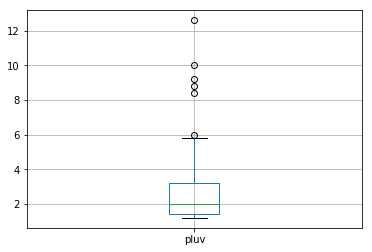

In [23]:
piovoso.boxplot('pluv')
plt.show()

#### Analiziamo il sensore del vento
Osservando i dati statistici questa volta selezioniamo i dati decidendo un limite superiore.  
Usiamo diversi grafici statistici per trarre conclusioni.

In [24]:
vento = meteo_al[meteo_al['vento_dir'] < 300]

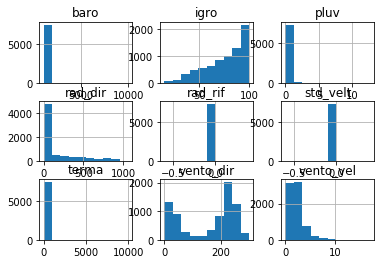

In [25]:
vento.hist()
plt.show()

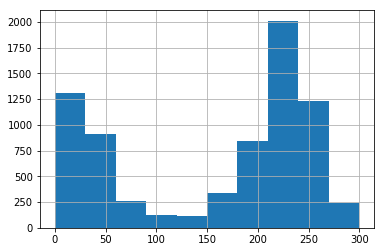

In [26]:
vento['vento_dir'].hist()
plt.show()

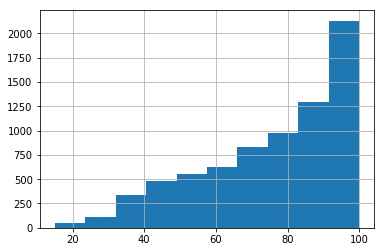

In [27]:
vento['igro'].hist()
plt.show()

/Users/stefania/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


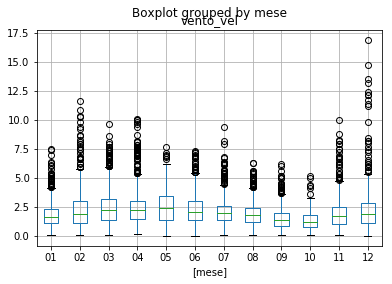

In [28]:
vento[['vento_vel', 'mese']].boxplot(by='mese')
plt.show()

#### Quali conclusioni puoi trarre da queste prime analisi?

## Let's play
In questo Jupyter Notebook abbiamo trattato i dati del 2001, puoi iniziare facendo analisi simili e confrontare i dati con gli altri anni includendo gli altri sensori non trattati insieme.

In seguito dal link menzionato sopra o dall'intero data base ARPA scarica altri .csv in un'apposita sotto cartella, e analizza l'andamento dei vari sensori. Ricorda che come abbiamo visto ci sono più modi per trattare i dati e creare i grafici, sperimenta applicando tutto ciò che abbiamo imparato insieme ed espandendoti leggendo documentazione o utilizzando `help()`.


Buona esplorazione!